Import Statements

In [1]:
!pip install tensorflow

In [23]:
import tensorflow as tf 
print(tf.__version__)
import pandas as pd
import matplotlib.pyplot as plt

2.18.0


In [4]:
data = pd.read_csv('/kaggle/input/students-score-dataset-linear-regression/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

Step1: Convert data to tensors

In [10]:
X = tf.constant(data['Hours'].values, dtype=tf.float32)
y = tf.constant(data['Scores'].values, dtype=tf.float32)

Step2: Perform basic arithmetic

In [13]:
multiplication = tf.multiply(X, y)
addition = tf.add(X,y)

In [14]:
print(f"Multiplication of tensors: {multiplication}")
print(f"Addition of tensors: {addition}")

Multiplication of tensors: [ 52.5     239.7      86.4     637.5     105.       30.      809.6
 330.      672.3      67.5     654.5     365.80002 184.5     138.59999
  18.7     845.49994  75.       45.6     408.69998 510.6      81.
 259.2     133.      524.4     670.8    ]
Addition of tensors: [ 23.5  52.1  30.2  83.5  33.5  21.5  97.2  65.5  89.3  27.7  92.7  67.9
  45.5  45.3  18.1 103.9  32.5  25.9  73.1  76.4  32.7  58.8  38.8  82.9
  93.8]


Step3: Create a simple linear model

In [16]:
m = tf.Variable(0.5, dtype=tf.float32)  # slope
b = tf.Variable(0.0, dtype=tf.float32)  # intercept

In [17]:
y_pred = m * X + b

Step4: Calculate Loss (Mean Squared Error)

In [18]:
loss = tf.reduce_mean(tf.square(y - y_pred))

Step5: Optimize the Model

In [19]:
#define learning rate 
learning_rate = 0.01

#number of training epochs 
epochs = 100

#oprimizer(stochastic gradient descent)
optimizer = tf.optimizers.SGD(learning_rate)

In [21]:
# Training loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Predict using the current m and b
        y_pred = m * X + b

        # Calculate loss (Mean Squared Error)
        loss = tf.reduce_mean(tf.square(y - y_pred))

    # Compute gradients using the tape object
    gradients = tape.gradient(loss, [m, b])

    # Update m and b using optimizer
    optimizer.apply_gradients(zip(gradients, [m, b]))

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.numpy():.4f}, m = {m.numpy():.4f}, b = {b.numpy():.4f}')

Epoch 0: Loss = 2953.9944, m = 6.5447, b = 0.9795


In [22]:
print(f"Final model: y = {m.numpy():.4f} * x + {b.numpy():.4f}")

Final model: y = 9.8816 * x + 1.8280


step6: visualize

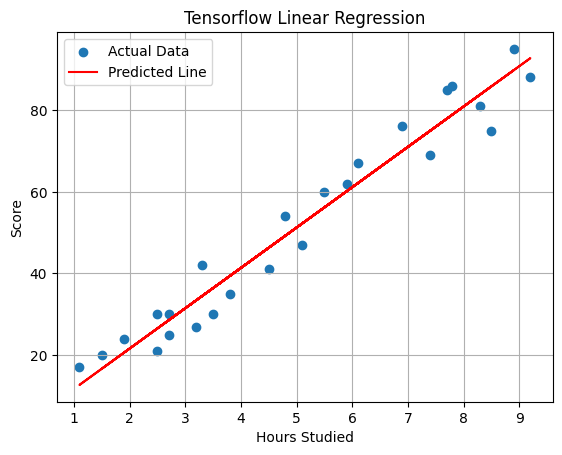

In [24]:
plt.scatter(data['Hours'], data['Scores'], label='Actual Data')
plt.plot(data['Hours'], y_pred.numpy(), color='red', label='Predicted Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.title('Tensorflow Linear Regression')
plt.grid(True)
plt.show()